# Problem 2.62
Similar to problem 2.61, except now the diagonal is a function of x rather than a constant due to the varying well. Lets make our life simple and do as the book said: ($\hbar=1, m=1, a=1$).

# Generating the Hamilitonian
The following code will generate the Hamilitonian matrix for our problem. 

In [2]:
# Create Hamiltonian Matrix
import numpy as np
import scipy.sparse.linalg as sp

def create_hamiltonian(dimension, end_point=0):
    # Let hbar = 1, m = 1.
    ham_mat = np.zeros((dimension,dimension), float)

    # Fill upper diagonal
    np.fill_diagonal(ham_mat[:,1:], -1)

    # Fill diagonal
    diag = [(2 + (500 / (dimension**2)) * np.sin(np.pi * j/dimension)) for j in range(1,dimension+1)]
    np.fill_diagonal(ham_mat, diag)

    # Fill lower diagonal
    np.fill_diagonal(ham_mat[1:], -1)

    # Retrieve vectors and values then return them
    w, v = sp.eigs(ham_mat, k=3, which='SR', return_eigenvectors=True)
    return (w,v)


# Using the Above Hamilitonian
Lets use our function above to generate a 100x100 matrix and find the first three energy states along with the wave function values for these three energy states. We can then see the approximate wave function by plotting the results.

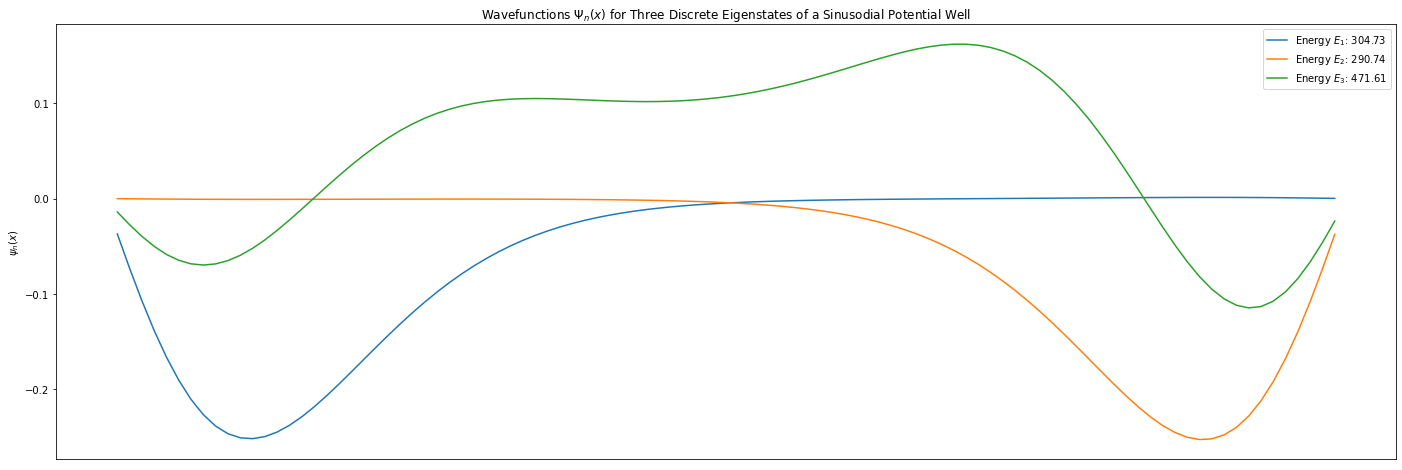

In [4]:
import matplotlib.pyplot as plt
evals, evecs = create_hamiltonian(100)

plt.figure(figsize=(24,8))

# Plot each eigenstate
for n in range(1,4):
    plt.plot(evecs.real[:, n-1], label=fr'Energy $E_{n}$: {100**2*evals.real[n-1]:.2f}')

plt.xticks([])
plt.ylabel(r'$\psi_n(x)$')
plt.title(r"Wavefunctions $\Psi_n(x)$ for Three Discrete Eigenstates of a Sinusodial Potential Well")
plt.legend()
plt.show()